In [1]:
import pandas as pd
import numpy as np
df1=pd.read_csv("../Data Model/US_Model.csv")
df2=pd.read_csv("../Data Model/EU_Model.csv")
df3=pd.read_csv("../Data Model/IN_Model.csv")
new_columns1 = [col + '_US' if col != 'Date' else col for col in df1]
new_columns2 = [col + '_EU' if col != 'Date' else col for col in df2]
new_columns3 = [col + '_IN' if col != 'Date' else col for col in df3]
df1.columns = new_columns1
df2.columns = new_columns2
df3.columns = new_columns3
df = pd.merge(df1, df2, on='Date')
df = pd.merge(df, df3, on='Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1013 non-null   object 
 1   PX_LAST_US             1013 non-null   float64
 2   GARCH_Volatility_US    1013 non-null   float64
 3   Sigma_Annualized_US    1013 non-null   float64
 4   VIX_US                 1013 non-null   float64
 5   SOFR3M_US              1013 non-null   float64
 6   Daily_STIR_US          1013 non-null   float64
 7   Theoretical_Spread_US  1013 non-null   float64
 8   PX_LAST_EU             1013 non-null   float64
 9   GARCH_Volatility_EU    1013 non-null   float64
 10  Sigma_Annualized_EU    1013 non-null   float64
 11  VSTOXX_EU              1013 non-null   float64
 12  EURIBOR3M_EU           1013 non-null   float64
 13  Daily_STIR_EU          1013 non-null   float64
 14  Theoretical_Spread_EU  1013 non-null   float64
 15  PX_L

In [2]:
df4=pd.read_csv("../Data Model/Portfolio_Value_US.csv")
df5=pd.read_csv("../Data Model/Portfolio_Value_EU.csv")
df6=pd.read_csv("../Data Model/Portfolio_Value_IN.csv")
new_columns4 = [col + '_US' if col != 'Date' else col for col in df4]
new_columns5 = [col + '_EU' if col != 'Date' else col for col in df5]
new_columns6 = [col + '_IN' if col != 'Date' else col for col in df6]
df4.columns = new_columns4
df5.columns = new_columns5
df6.columns = new_columns6
df_a = pd.merge(df4, df5, on='Date')
df_a = pd.merge(df_a, df6, on='Date')
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      161 non-null    object 
 1   PX_LAST_US                161 non-null    float64
 2   GARCH_Volatility_US       161 non-null    float64
 3   Sigma_Annualized_US       161 non-null    float64
 4   VIX_US                    161 non-null    float64
 5   SOFR3M_US                 161 non-null    float64
 6   Daily_STIR_US             161 non-null    float64
 7   CFD_Ask_US                161 non-null    float64
 8   CFD_Bid_US                161 non-null    float64
 9   Portfolio_Value_Upper_US  161 non-null    float64
 10  Portfolio_Value_Lower_US  161 non-null    float64
 11  Cumulative_Cost_Upper_US  161 non-null    float64
 12  Cumulative_Cost_Lower_US  161 non-null    float64
 13  PX_LAST_EU                161 non-null    float64
 14  GARCH_Vola

ANOVA - Volatility
	df	sum_sq	mean_sq	F	PR(>F)
C(Region)	2.0000	0.0061	0.0031	258.0417	0.0000
Residual	3036.0000	0.0359	0.0000		



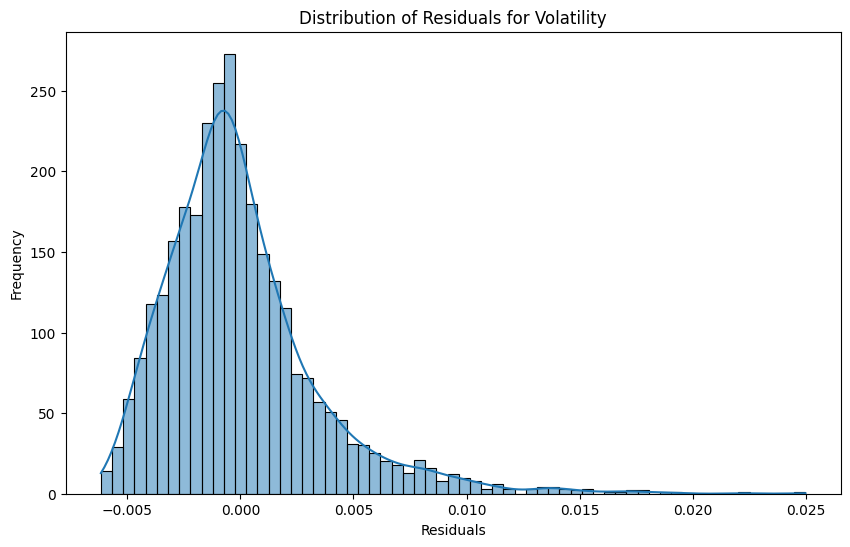

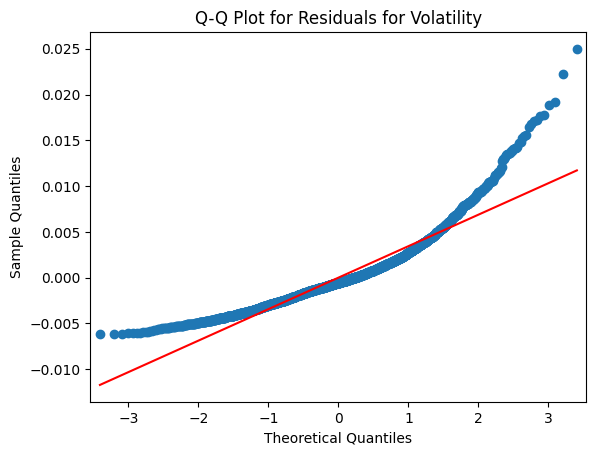

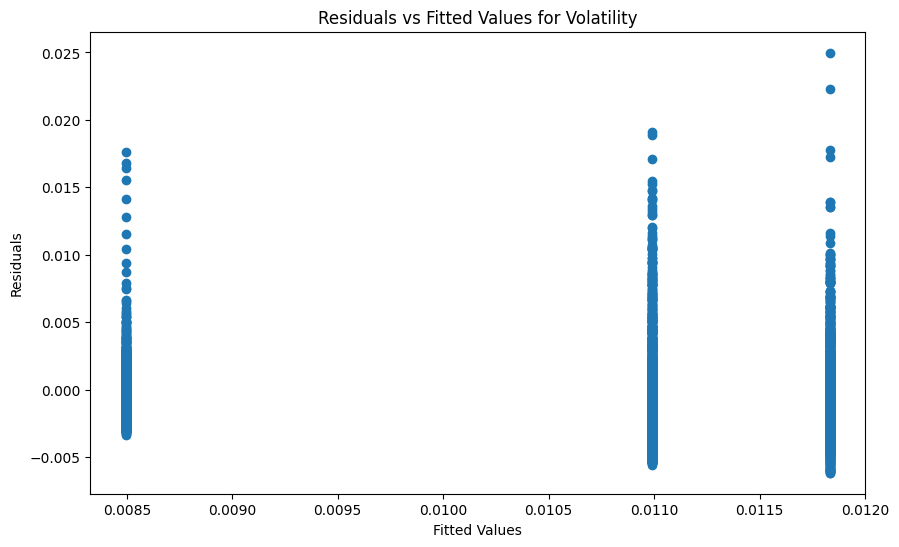

In [3]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

anova_df = pd.DataFrame({'GARCH_Volatility': df[['GARCH_Volatility_US', 'GARCH_Volatility_EU', 'GARCH_Volatility_IN']].values.flatten(),
                         'CFD_Spread': df[['Theoretical_Spread_US', 'Theoretical_Spread_EU', 'Theoretical_Spread_IN']].values.flatten(),
                         'Region': np.repeat(['US', 'EU', 'IN'], df.shape[0], axis=0)})
print("ANOVA - Volatility")
model_sigma = ols('GARCH_Volatility ~ C(Region)', data=anova_df).fit()
anova_table_sigma = anova_lm(model_sigma, typ=1)
print(anova_table_sigma.to_csv(sep='\t', float_format='%.4f'))

residuals_sigma = model_sigma.resid
fitted_values_sigma = model_sigma.fittedvalues


plt.figure(figsize=(10, 6))
sns.histplot(residuals_sigma, kde=True)
plt.title('Distribution of Residuals for Volatility')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
sm.qqplot(residuals_sigma, line='s')
plt.title('Q-Q Plot for Residuals for Volatility')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_sigma, residuals_sigma)
plt.title('Residuals vs Fitted Values for Volatility')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



ANOVA - Transformed Volatility
	df	sum_sq	mean_sq	F	PR(>F)
C(Region)	2.0000	38663.9478	19331.9739	331.5129	0.0000
Residual	3036.0000	177042.5130	58.3144		



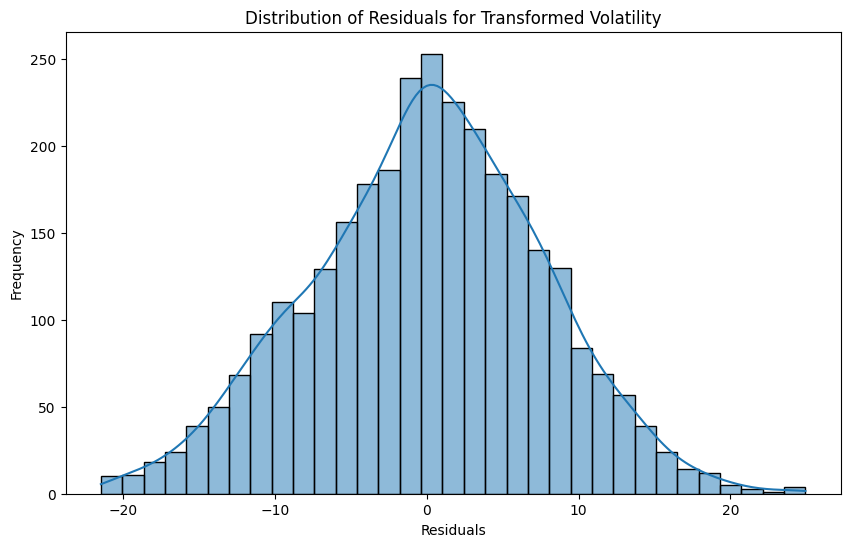

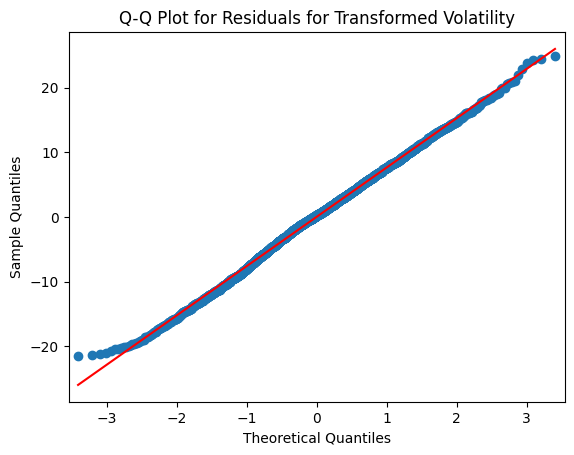

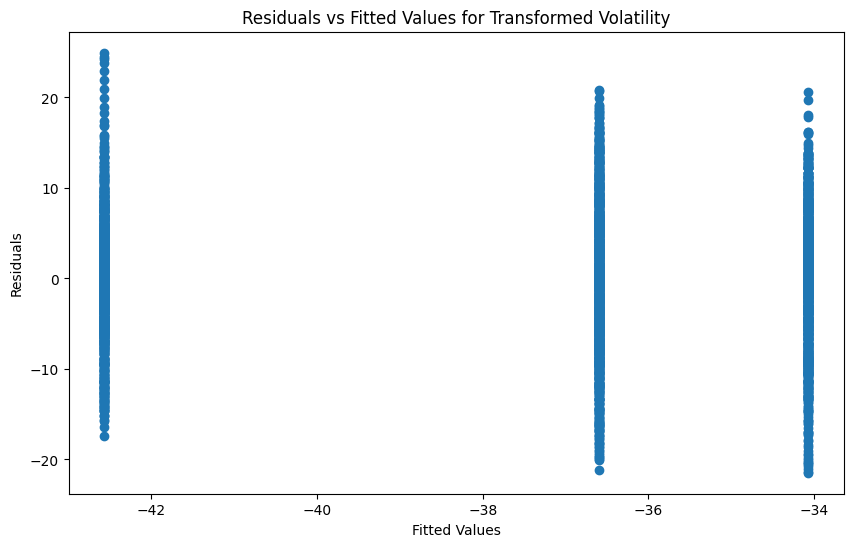

In [4]:
from scipy.stats import boxcox
anova_df['Transformed_Volatility'] = boxcox(anova_df['GARCH_Volatility'])[0]
model_sigma_transformed = ols('Transformed_Volatility ~ C(Region)', data=anova_df).fit()
residulals_sigma_transformed = model_sigma_transformed.resid
fitted_values_sigma_transformed = model_sigma_transformed.fittedvalues

print("ANOVA - Transformed Volatility")
anova_table_sigma_transformed = anova_lm(model_sigma_transformed, typ=1)
print(anova_table_sigma_transformed.to_csv(sep='\t', float_format='%.4f'))

plt.figure(figsize=(10, 6))
sns.histplot(residulals_sigma_transformed, kde=True)
plt.title('Distribution of Residuals for Transformed Volatility')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
sm.qqplot(residulals_sigma_transformed, line='s')
plt.title('Q-Q Plot for Residuals for Transformed Volatility')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_sigma_transformed, residulals_sigma_transformed)
plt.title('Residuals vs Fitted Values for Transformed Volatility')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

ANOVA - CFD Spread
	df	sum_sq	mean_sq	F	PR(>F)
C(Region)	2.0000	131.5114	65.7557	33.8815	0.0000
Residual	3036.0000	5892.1252	1.9408		



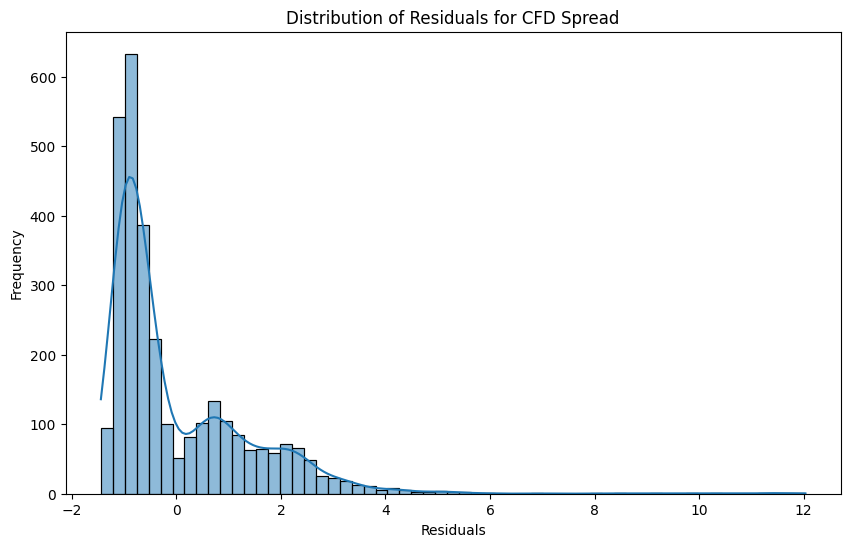

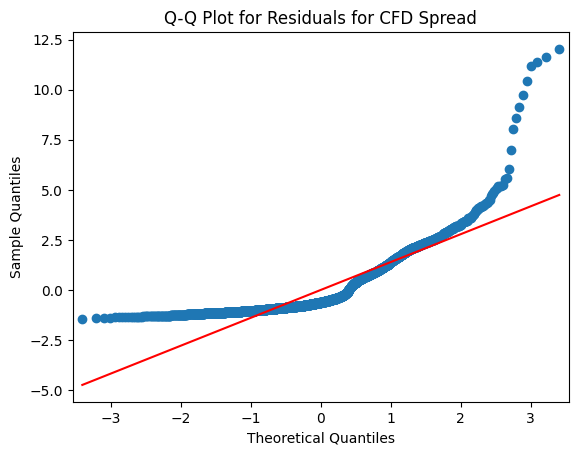

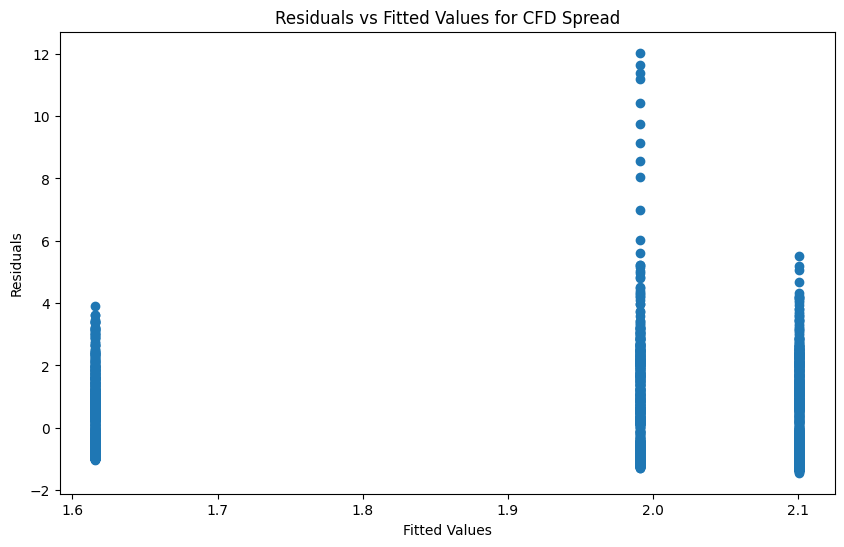

In [5]:
print("ANOVA - CFD Spread")
model_spread = ols('CFD_Spread ~ C(Region)', data=anova_df).fit()
anova_table_spread = anova_lm(model_spread, typ=1)
print(anova_table_spread.to_csv(sep='\t', float_format='%.4f'))

residuals_spread = model_spread.resid
fitted_values_spread = model_spread.fittedvalues

plt.figure(figsize=(10, 6))
sns.histplot(residuals_spread, kde=True)
plt.title('Distribution of Residuals for CFD Spread')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
sm.qqplot(residuals_spread, line='s')
plt.title('Q-Q Plot for Residuals for CFD Spread')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_spread, residuals_spread)
plt.title('Residuals vs Fitted Values for CFD Spread')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [6]:
import scipy.stats as stats
def welchs_anova(data, value_col, group_col):
    groups = data[group_col].unique()
    group_data = [data[data[group_col] == g][value_col] for g in groups]
    f_stat, p_value = stats.f_oneway(*group_data)

    return f_stat, p_value

f_stat, p_value1 = welchs_anova(anova_df, 'CFD_Spread', 'Region')


from scipy.stats import kruskal
group1 = anova_df[anova_df['Region'] == 'US']['CFD_Spread']
group2 = anova_df[anova_df['Region'] == 'EU']['CFD_Spread']
group3 = anova_df[anova_df['Region'] == 'IN']['CFD_Spread']
stat, p_value2 = kruskal(group1, group2, group3)

results = pd.DataFrame({'ANOVA Test': ["Welch' ANOVA", "Kruskal-Wallis's Test"],
                        'F-Static': [f_stat, stat],
                        'p-value': [p_value1, p_value2]})
print(results.to_csv(sep='\t', float_format='%.4f', index = 0))


ANOVA Test	F-Static	p-value
Welch' ANOVA	33.8815	0.0000
Kruskal-Wallis's Test	145.0600	0.0000



In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results_sigma = pairwise_tukeyhsd(anova_df['GARCH_Volatility'], anova_df['Region'])
print("Tukey's HSD Results for Volatility")
tukey_results_sigma_df = pd.DataFrame(data=tukey_results_sigma._results_table.data[1:], columns=tukey_results_sigma._results_table.data[0])
print(tukey_results_sigma_df.to_csv(sep='\t', float_format='%.4f'))

print("Tukey's HSD Results for CFD Spread")
tukey_results_spread = pairwise_tukeyhsd(anova_df['CFD_Spread'], anova_df['Region'])
tukey_results_spread_df = pd.DataFrame(data=tukey_results_spread._results_table.data[1:], columns=tukey_results_sigma._results_table.data[0])
print(tukey_results_spread_df.to_csv(sep='\t', float_format='%.4f'))



Tukey's HSD Results for Volatility
	group1	group2	meandiff	p-adj	lower	upper	reject
0	EU	IN	-0.0033	0.0000	-0.0037	-0.0030	True
1	EU	US	-0.0008	0.0000	-0.0012	-0.0005	True
2	IN	US	0.0025	0.0000	0.0021	0.0029	True

Tukey's HSD Results for CFD Spread
	group1	group2	meandiff	p-adj	lower	upper	reject
0	EU	IN	-0.1099	0.1781	-0.2550	0.0353	False
1	EU	US	-0.4858	0.0000	-0.6310	-0.3407	True
2	IN	US	-0.3760	0.0000	-0.5211	-0.2308	True



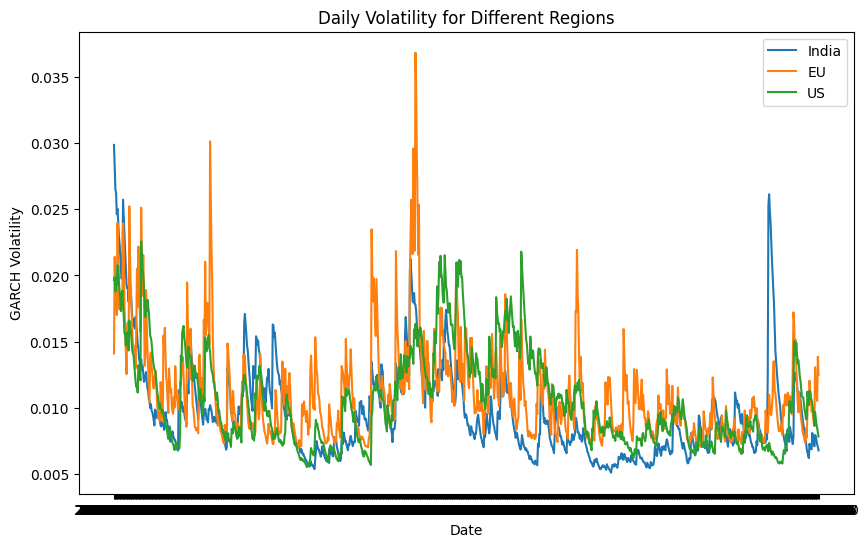

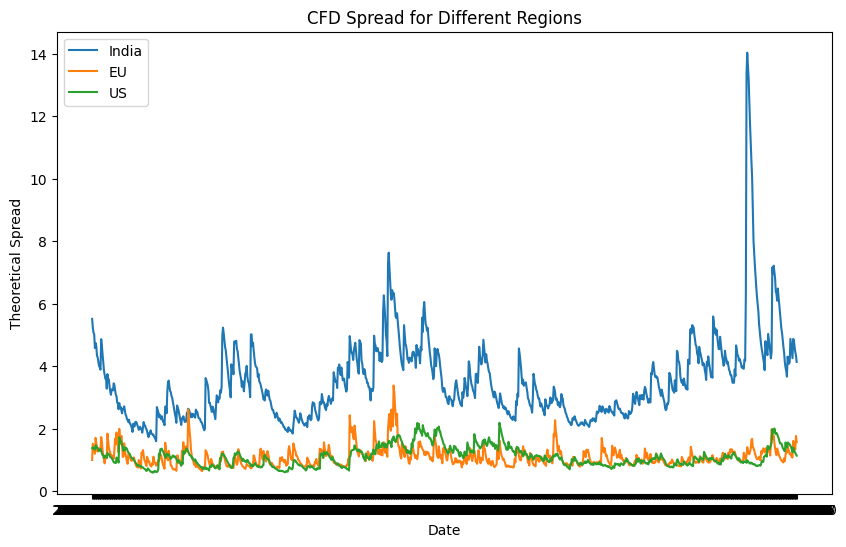

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='GARCH_Volatility_IN', data=df, label='India')
sns.lineplot(x='Date', y='GARCH_Volatility_EU', data=df, label='EU')
sns.lineplot(x='Date', y='GARCH_Volatility_US', data=df, label='US')
plt.title('Daily Volatility for Different Regions')
plt.xlabel('Date')
plt.ylabel('GARCH Volatility')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Theoretical_Spread_IN', data=df, label='India')
sns.lineplot(x='Date', y='Theoretical_Spread_EU', data=df, label='EU')
sns.lineplot(x='Date', y='Theoretical_Spread_US', data=df, label='US')
plt.title('CFD Spread for Different Regions')
plt.xlabel('Date')
plt.ylabel('Theoretical Spread')
plt.legend()
plt.show()